In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

cf.set_config_file(offline = True)
sns.set(style="whitegrid")

NameError: name 'cf' is not defined

In [2]:
solar1=pd.read_csv('/content/df_solar1.csv')
df_srckey_label1 = pd.read_csv('/content/df_srckey_label1.csv')

solar2=pd.read_csv('/content/df_solar2.csv')
df_srckey_label2 = pd.read_csv('/content/df_srckey_label2.csv')

In [3]:
data1= solar1.copy()
data2= solar2.copy()

In [4]:
df_srckey_label1.reset_index(inplace= True)
df_srckey_label2.reset_index(inplace= True)

In [5]:
data1['SOURCE_KEY'] = data1['SOURCE_KEY_NUMBER'].map(df_srckey_label1['SOURCE_KEY'])
data2['SOURCE_KEY'] = data2['SOURCE_KEY_NUMBER'].map(df_srckey_label2['SOURCE_KEY'])


In [7]:
plant1= data1.groupby("DATE_TIME")[["DC_POWER" ,"AC_POWER", "DAILY_YIELD", "TOTAL_YIELD"]].sum()
plant2= data2.groupby("DATE_TIME")[["DC_POWER" ,"AC_POWER", "DAILY_YIELD", "TOTAL_YIELD"]].sum()

In [10]:
plant1.reset_index(inplace= True)
plant2.reset_index(inplace= True)

In [22]:
plant1["DATE_TIME"] = pd.to_datetime(plant1["DATE_TIME"])
plant2["DATE_TIME"] = pd.to_datetime(plant2["DATE_TIME"])

In [25]:
plant1["HOURS"] = plant1["DATE_TIME"].dt.hour
plant2["HOURS"] = plant2["DATE_TIME"].dt.hour

plant1["DATE"] = plant1["DATE_TIME"].dt.date
plant2["DATE"] = plant2["DATE_TIME"].dt.date

In [26]:
plant1.head()

,index,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOURS,DATE
0,0,2020-05-15 00:00:00,0.0,0.0,0.0,143581676.0,0,2020-05-15
1,1,2020-05-15 00:15:00,0.0,0.0,0.0,143581676.0,0,2020-05-15
2,2,2020-05-15 00:30:00,0.0,0.0,0.0,143581676.0,0,2020-05-15
3,3,2020-05-15 00:45:00,0.0,0.0,0.0,143581676.0,0,2020-05-15
4,4,2020-05-15 01:00:00,0.0,0.0,0.0,150761642.0,1,2020-05-15


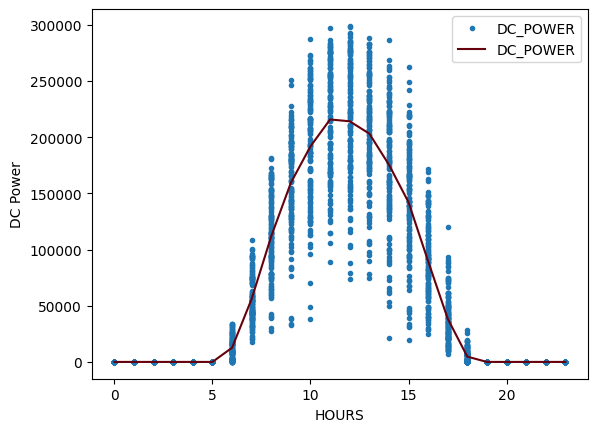

In [28]:
plant1.plot(x ='HOURS', y = 'DC_POWER', style=".")
plant1.groupby("HOURS")["DC_POWER"].agg('mean').plot(legend= True, colormap='Reds_r')
plt.ylabel("DC Power")
plt.show()

ambient temp, wrt seasonal, trend and residual

In [29]:
from scipy.signal import periodogram

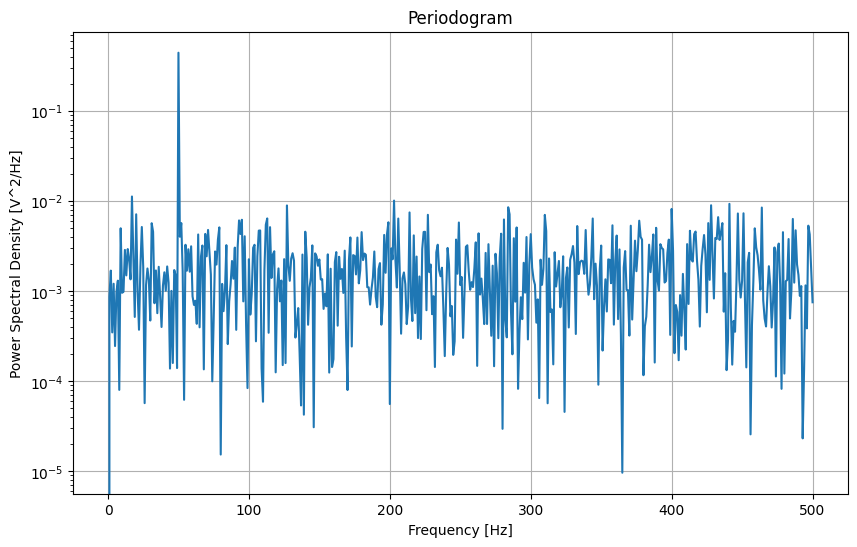

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Generate a sample time series (e.g., a sine wave with noise)
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + np.random.randn(len(t))  # 50 Hz signal with noise

# Compute the periodogram
frequencies, power = periodogram(signal, fs)

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power)  # Log scale for better visibility
plt.title('Periodogram')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')
plt.grid(True)
plt.show()


In [33]:
am_temp = data1.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('mean')

In [34]:
am_change_temp = (am_temp.diff()/am_temp)*100

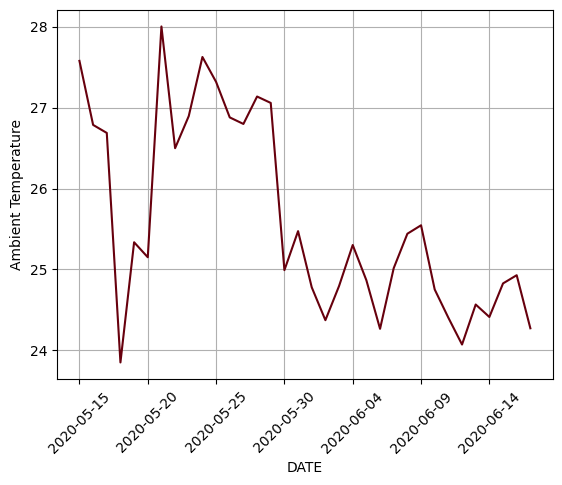

In [36]:
am_temp.plot(grid= True, colormap='Reds_r')
plt.ylabel("Ambient Temperature")
plt.xticks(rotation= 45)
plt.show()

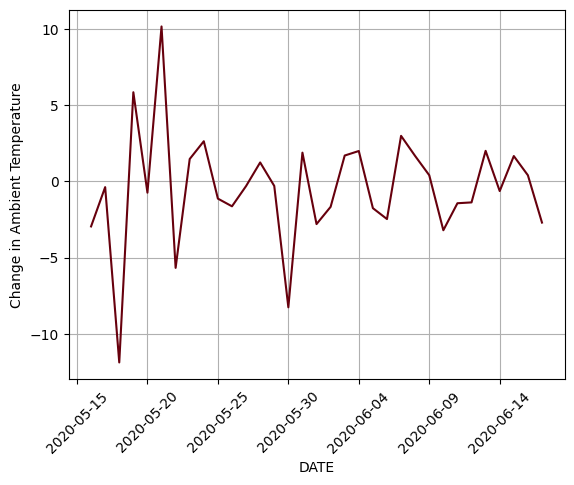

In [37]:
am_change_temp.plot(grid= True, colormap='Reds_r')
plt.ylabel("Change in Ambient Temperature")
plt.xticks(rotation= 45)
plt.show()

In [40]:
import statsmodels.api as sm

In [45]:
data1.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DATE', 'TIME', 'DAY', 'MONTH', 'WEEK', 'HOURS',
       'MINUTES', 'TOTAL MINUTES PASS', 'DATE_STRING', 'SOURCE_KEY_NUMBER'],
      dtype='object')

In [57]:
plant1col= ['DAY','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD']

In [58]:
x=data1[plant1col]

<Axes: >

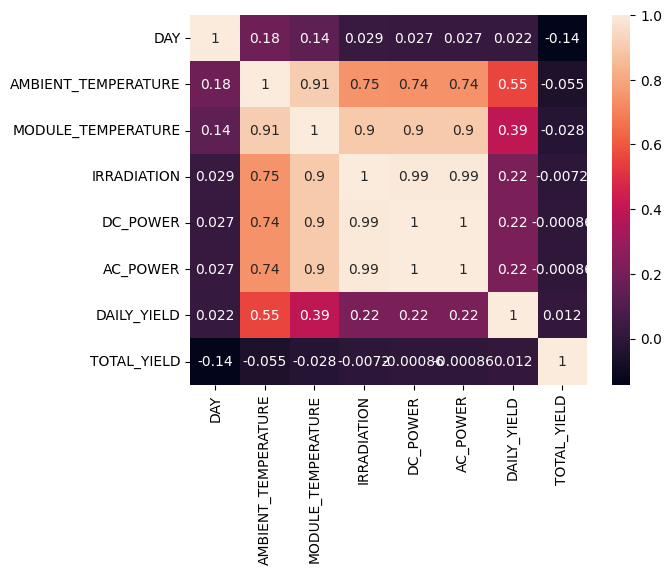

In [61]:
x.corr(method= 'spearman')
sns.heatmap(x.corr(method= 'spearman'), annot= True)

<Axes: >

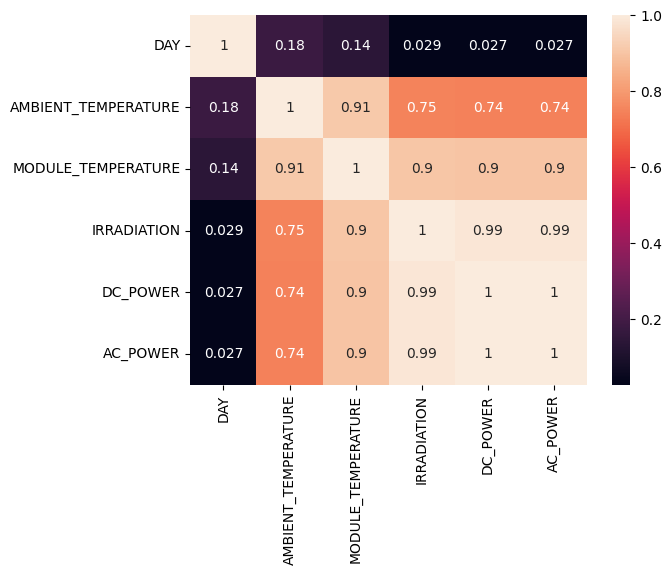

In [62]:
plant1__col= ['DAY','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DC_POWER', 'AC_POWER']
x2 = data1[plant1__col]
sns.heatmap(x2.corr(method= 'spearman'), annot= True)

Text(0, 0.5, 'Power (KW)')

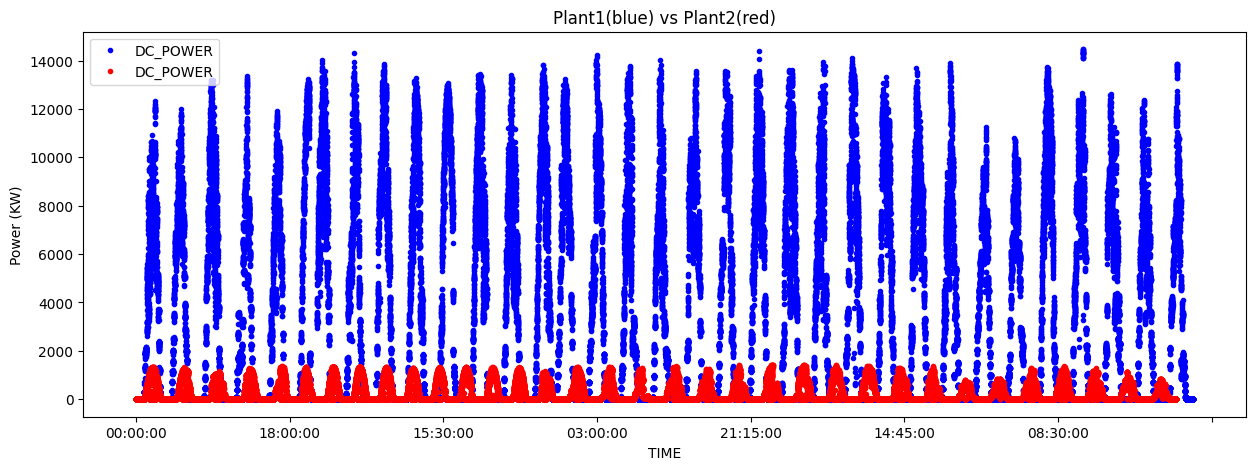

In [70]:
ax = data1.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='b.')
data2.plot(x='TIME', y='DC_POWER', legend=True, style='r.', ax=ax)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')

Text(0, 0.5, 'Power (KW)')

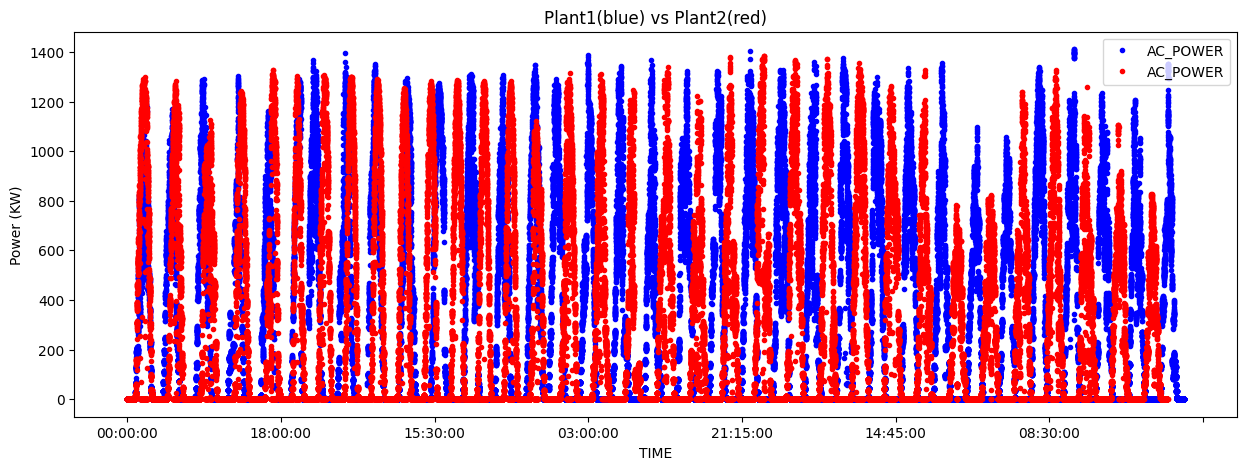

In [71]:
ax = data1.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='b.')
data2.plot(x='TIME', y='AC_POWER', legend=True, style='r.', ax=ax)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')